In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('hh_EDA.csv')
df

,Link,Vacancy,Wage,Company,City,Experience,Company`s rating,Working hours,Employee`s location
0,https://adsrv.hh.ru/click?b=1003372&place=35&m...,Водитель со своим грузовым автомобилем,180000,ИП Петрикин Александр Вячеславович,Москва,Без опыта,4.5,Полная занятость,В офисе
1,https://adsrv.hh.ru/click?b=993174&place=36&me...,Консультант поддержки в Яндекс Путешествия,30000,Яндекс Крауд: Поддержка,Москва,Без опыта,4.0,Полная занятость,Удалённая работа
2,https://hh.ru/vacancy/98672015?hhtmFrom=vacanc...,Менеджер по заполнению анкет (удаленно),36800,ИП Кабин Дмитрий Владимирович,Москва,Без опыта,3.5,Полная занятость,Удалённая работа
3,https://hh.ru/vacancy/98657055?hhtmFrom=vacanc...,Ручной тестировщик (QA Manual Junior),60000,Oxytocin,Москва,Без опыта,3.5,Полная занятость,В офисе
4,https://hh.ru/vacancy/93848299?utm_source=head...,Торговый представитель (Водитель-курьер),170000,ЦУМ,Москва,Опыт от 1 года до 3 лет,4.0,Полная занятость,Сменный график
...,...,...,...,...,...,...,...,...,...
2072,https://hh.ru/vacancy/98610683?hhtmFrom=vacanc...,Кладовщик,70000,ООО ЦУГАМ,Москва,Опыт от 1 года до 3 лет,2.0,Частичная занятость,В офисе
2073,https://hh.ru/vacancy/98627094?hhtmFrom=vacanc...,"Специалист по клиническим исследованиям, CRA, ...",70000,ООО ЦУГАМ,Москва,Опыт от 1 года до 3 лет,2.0,Частичная занятость,В офисе
2074,https://hh.ru/vacancy/98631350?hhtmFrom=vacanc...,Официант в Кремль,70000,ФГБУ Комбинат питания Кремлевский,Москва,Опыт от 3 до 6 лет,2.0,Частичная занятость,В офисе
2075,https://hh.ru/vacancy/98673570?hhtmFrom=vacanc...,"Водитель с грузовым автомобилем, смена от 9000...",160000,Центр Доставки,Москва,Без опыта,2.0,Частичная занятость,В офисе


In [3]:
df.Vacancy.nunique()

1734

=> анализировать профессии будет проблематично

анализ:
1) опыт работы - зпшка
2) часы работы - зпшка
3) рейтинг компании - опыт работы

In [4]:
df.Experience.value_counts()

Experience
Без опыта                  954
Опыт от 1 года до 3 лет    724
Опыт от 3 до 6 лет         308
Опыт более 6 лет            91
Name: count, dtype: int64

In [5]:
df['Wage, K'] = df['Wage'].map(lambda x: x / 1000)
df.head()

,Link,Vacancy,Wage,Company,City,Experience,Company`s rating,Working hours,Employee`s location,"Wage, K"
0,https://adsrv.hh.ru/click?b=1003372&place=35&m...,Водитель со своим грузовым автомобилем,180000,ИП Петрикин Александр Вячеславович,Москва,Без опыта,4.5,Полная занятость,В офисе,180.0
1,https://adsrv.hh.ru/click?b=993174&place=36&me...,Консультант поддержки в Яндекс Путешествия,30000,Яндекс Крауд: Поддержка,Москва,Без опыта,4.0,Полная занятость,Удалённая работа,30.0
2,https://hh.ru/vacancy/98672015?hhtmFrom=vacanc...,Менеджер по заполнению анкет (удаленно),36800,ИП Кабин Дмитрий Владимирович,Москва,Без опыта,3.5,Полная занятость,Удалённая работа,36.8
3,https://hh.ru/vacancy/98657055?hhtmFrom=vacanc...,Ручной тестировщик (QA Manual Junior),60000,Oxytocin,Москва,Без опыта,3.5,Полная занятость,В офисе,60.0
4,https://hh.ru/vacancy/93848299?utm_source=head...,Торговый представитель (Водитель-курьер),170000,ЦУМ,Москва,Опыт от 1 года до 3 лет,4.0,Полная занятость,Сменный график,170.0


In [8]:
min(df['Wage, K'])

1.0

In [9]:
df['Working hours changed'] = df['Working hours'].map(lambda x: 'Другое' if x != 'Полная занятость' and x != 'Частичная занятость' else x)
df.head()

,Link,Vacancy,Wage,Company,City,Experience,Company`s rating,Working hours,Employee`s location,"Wage, K",Working hours changed
0,https://adsrv.hh.ru/click?b=1003372&place=35&m...,Водитель со своим грузовым автомобилем,180000,ИП Петрикин Александр Вячеславович,Москва,Без опыта,4.5,Полная занятость,В офисе,180.0,Полная занятость
1,https://adsrv.hh.ru/click?b=993174&place=36&me...,Консультант поддержки в Яндекс Путешествия,30000,Яндекс Крауд: Поддержка,Москва,Без опыта,4.0,Полная занятость,Удалённая работа,30.0,Полная занятость
2,https://hh.ru/vacancy/98672015?hhtmFrom=vacanc...,Менеджер по заполнению анкет (удаленно),36800,ИП Кабин Дмитрий Владимирович,Москва,Без опыта,3.5,Полная занятость,Удалённая работа,36.8,Полная занятость
3,https://hh.ru/vacancy/98657055?hhtmFrom=vacanc...,Ручной тестировщик (QA Manual Junior),60000,Oxytocin,Москва,Без опыта,3.5,Полная занятость,В офисе,60.0,Полная занятость
4,https://hh.ru/vacancy/93848299?utm_source=head...,Торговый представитель (Водитель-курьер),170000,ЦУМ,Москва,Опыт от 1 года до 3 лет,4.0,Полная занятость,Сменный график,170.0,Полная занятость


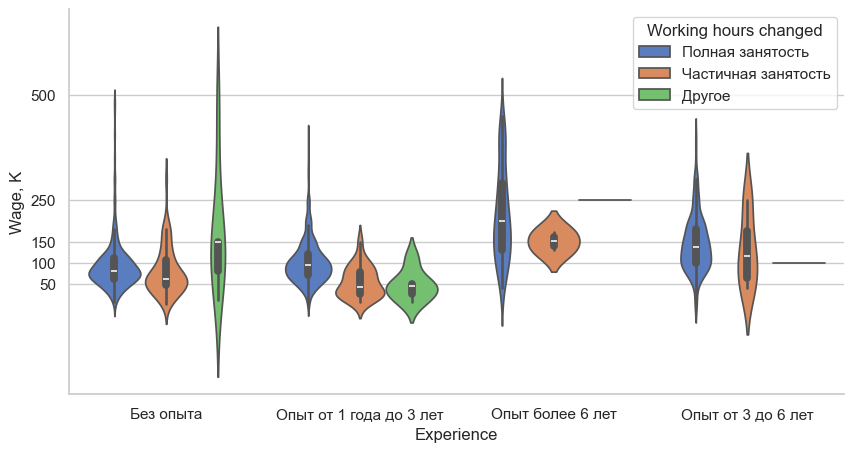

In [11]:
sns.set_theme(style='whitegrid', palette='muted')
f, ax = plt.subplots(figsize=(10, 5))
sns.despine(f)
experience_wage = sns.violinplot(data=df.loc[df['Wage, K'] < 500], y='Wage, K', x='Experience', hue='Working hours changed')
# ax.set(ylabel="")
ax.set_yticks([50, 100, 150, 250, 500])

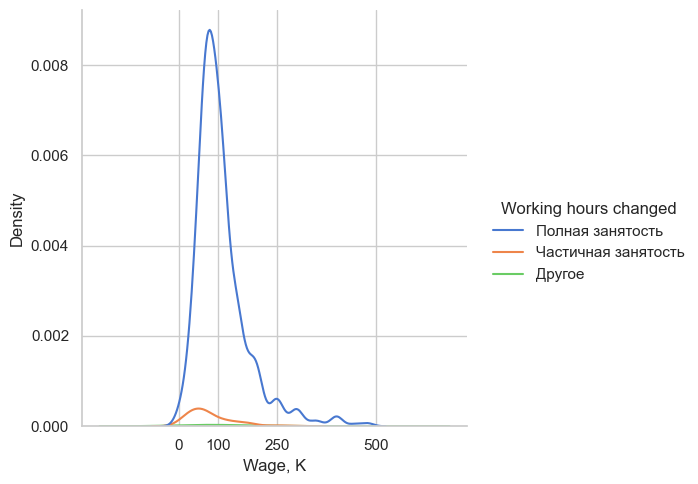

In [13]:
# f, ax = plt.subplots(figsize=(10, 5))
# sns.despine(f)
sns.displot(
    data=df.loc[df['Wage, K'] < 500],
    x='Wage, K', hue='Working hours changed',
    kind="kde")
ax = plt.gca()
ax.set_xticks([0, 100, 250, 500])

Text(0.5, 1.0, 'Гистограмма зп в тысячах рублей')

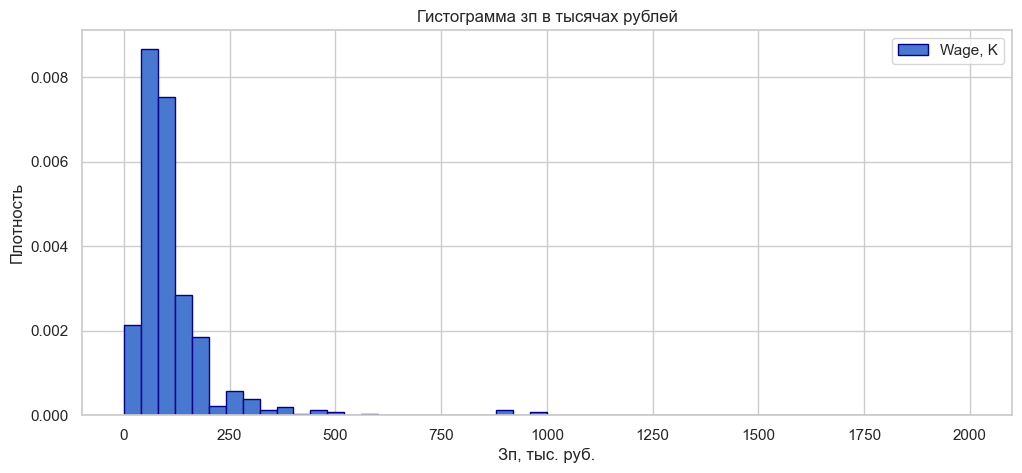

In [19]:
plt.figure(figsize = (12,5))
df['Wage, K'].hist(bins = 50, edgecolor = 'darkblue', density=True, legend = True)
    
plt.xlabel('Зп, тыс. руб.')
plt.ylabel('Плотность')
plt.title('Гистограмма зп в тысячах рублей')

 видим выброс - зп в два миллиона. Попробуем его убрать

In [26]:
df.loc[df['Wage, K'] == 2000]

,Link,Vacancy,Wage,Company,City,Experience,Company`s rating,Working hours,Employee`s location,"Wage, K",Working hours changed
836,https://hh.ru/vacancy/97905240?hhtmFrom=vacanc...,Генеральный директор,2000000,Alpha Personnel,Москва,Опыт более 6 лет,5.0,Полная занятость,В офисе,2000.0,Полная занятость


In [33]:
df.drop(836, inplace=True)

In [34]:
df.iloc[836] #строка удалилась, теперь построим два графика заново

Link                     https://hh.ru/vacancy/97348905?hhtmFrom=vacanc...
Vacancy                             Оператор ввода данных/контент-менеджер
Wage                                                                 45000
Company                                                           ООО НАНО
City                                                                Москва
Experience                                                       Без опыта
Company`s rating                                                       5.0
Working hours                                             Полная занятость
Employee`s location                                       Удалённая работа
Wage, K                                                               45.0
Working hours changed                                     Полная занятость
Name: 837, dtype: object

Text(0.5, 1.0, 'Гистограмма зп в тысячах рублей')

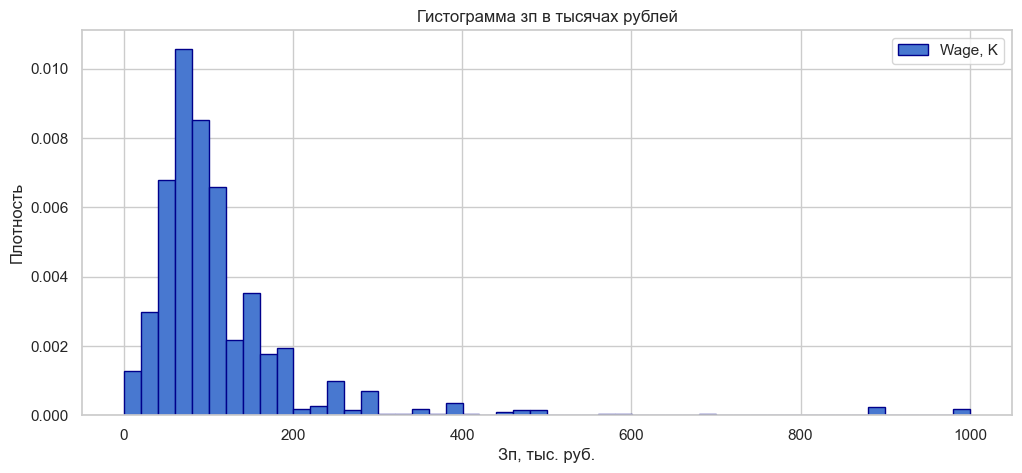

In [35]:
plt.figure(figsize = (12,5))
df['Wage, K'].hist(bins = 50, edgecolor = 'darkblue', density=True, legend = True)
    
plt.xlabel('Зп, тыс. руб.')
plt.ylabel('Плотность')
plt.title('Гистограмма зп в тысячах рублей')

Text(0, 0.5, 'Зп в тыс.руб.')

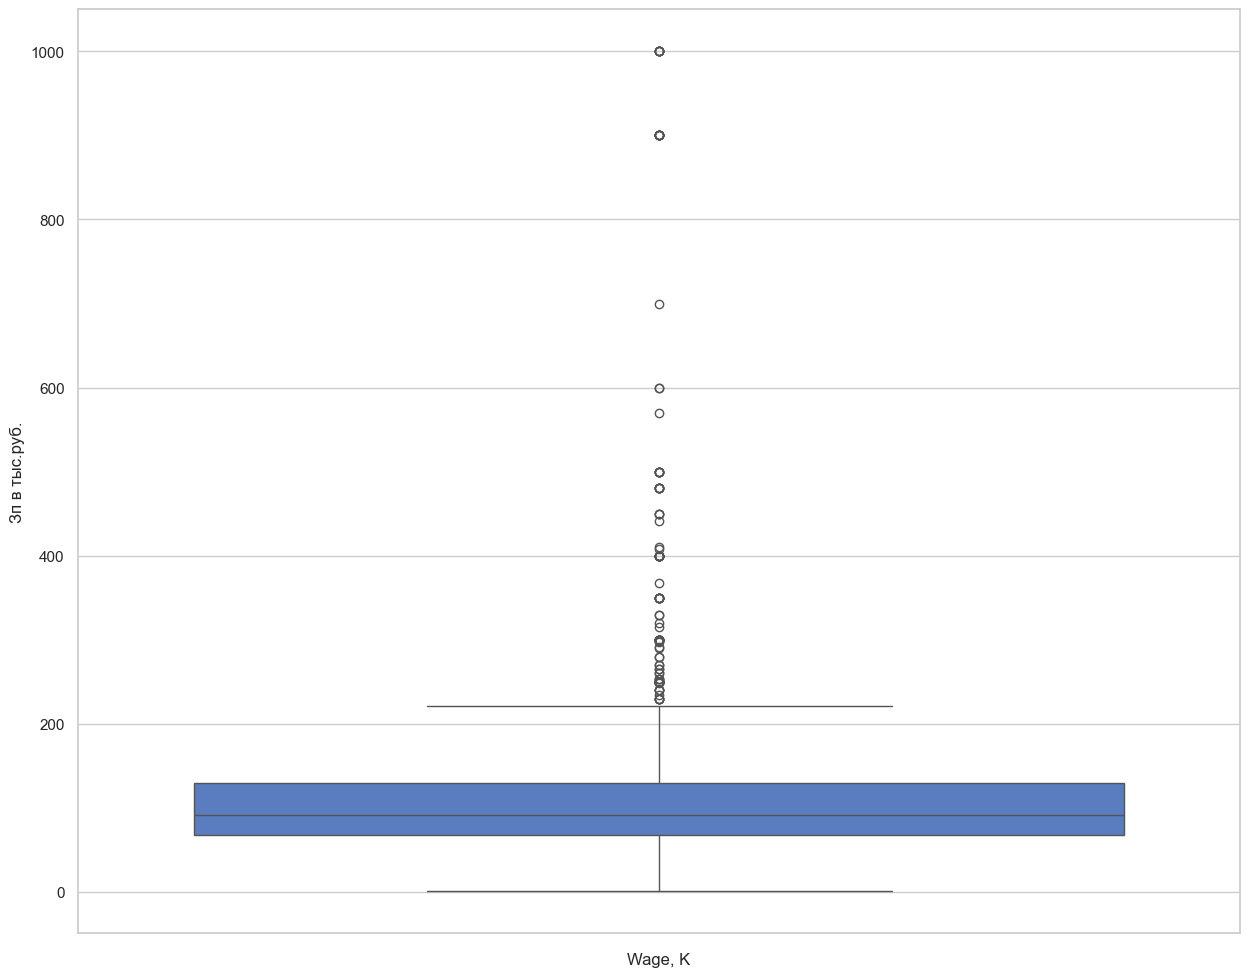

In [36]:
plt.figure(figsize = (15,12))
sns.boxplot(data=df['Wage, K'])

plt.xlabel('Wage, K')
plt.ylabel('Зп в тыс.руб.')

Опять же, есть выбросы и их много, но большинство зп - около 100к рублей